## LDD Exploring Data

### Setup

In [46]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

In [47]:
output_dir = '../images'
os.makedirs(output_dir, exist_ok=True)

In [48]:
def save_plot(fig, filename):
    file_path = os.path.join(output_dir, filename)
    fig.savefig(file_path, bbox_inches='tight')
    print(f'Imagem salva como {file_path}')

### Recovering the data

In [49]:
import pandas as pd

In [50]:
ML_ROOT_DIR = "../../ml-models"
FOLDER_ID = "dataset"
LDD_PATH = os.path.join(ML_ROOT_DIR, FOLDER_ID)

In [51]:
def load_ldd_data(ldd_path = LDD_PATH):
  csv_path = os.path.join(ldd_path, 'LDD-dataset.csv')
  return pd.read_csv(csv_path)

### Understanding the data structure

In [52]:
ldd = load_ldd_data()

In [53]:
ldd.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


Existem 14 atributos na base de dados, com colunas categóricas (Gender e Class) e numéricas. 

In [54]:
# Removing unnecessary columns
ldd = ldd.drop(columns=['ID', 'No_Pation'])

In [55]:
ldd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   object 
 1   AGE     1000 non-null   int64  
 2   Urea    1000 non-null   float64
 3   Cr      1000 non-null   int64  
 4   HbA1c   1000 non-null   float64
 5   Chol    1000 non-null   float64
 6   TG      1000 non-null   float64
 7   HDL     1000 non-null   float64
 8   LDL     1000 non-null   float64
 9   VLDL    1000 non-null   float64
 10  BMI     1000 non-null   float64
 11  CLASS   1000 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 93.9+ KB


O dataset apresenta um total de 1000 registros, sendo que todas as colunas apresentam valores, ou seja não há valores ausentes.

In [56]:
# Visualizing the distribution of the target variable
ldd['CLASS'].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [57]:
# Fixing duplicate values ​​in target variable
ldd['CLASS'] = ldd['CLASS'].str.upper().str.strip()

In [58]:
ldd['CLASS'].value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

In [59]:
# Viewing the distribution of the Gender variable
ldd['Gender'].value_counts()

Gender
M    565
F    434
f      1
Name: count, dtype: int64

In [60]:
# Correcting formatting errors
ldd['Gender'] = ldd['Gender'].str.upper()

In [61]:
ldd['Gender'].value_counts()

Gender
M    565
F    435
Name: count, dtype: int64

In [62]:
ldd.describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [63]:
# histogram for numeric attributes
%matplotlib inline
import matplotlib.pyplot as plt

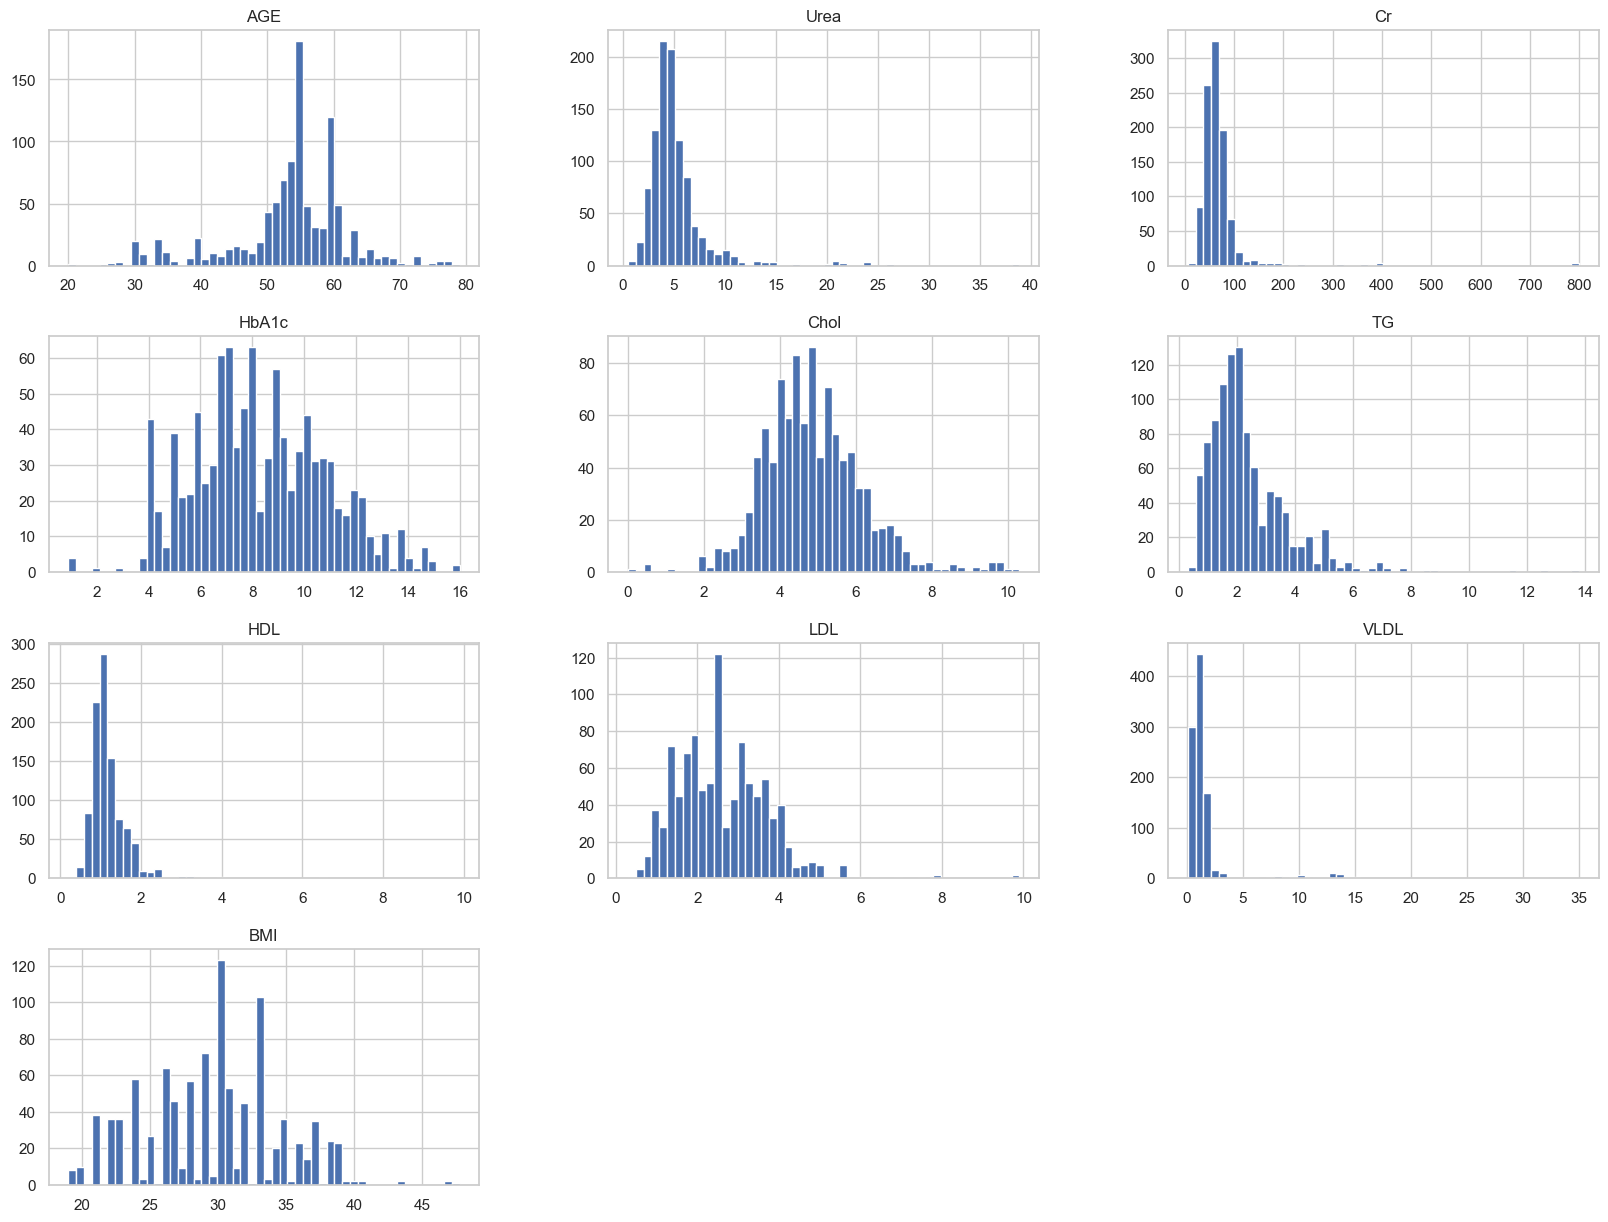

In [64]:
ldd.hist(bins=50, figsize=(20, 15))
plt.show()

Observações apontadas:
- `Urea`, `Cr`, `VLDL`, e `TG`, apresentam distribuições assimétricas, com caudas longas ou concentração próxima de zero;
- `Cr`, `Urea`, e `VLDL` mostram valores extremos que podem ser outliers;
- Algumas variáveis, como `HDL`, `TG`, `VLDL`, e `Cr`, apresentam enviesamento (skewness);
- As variáveis estão em escalas muito diferentes.

In [65]:
# encoding GENDER and CLASS
ldd['Gender'] = ldd['Gender'].map({'M': 1, 'F': 0})
ldd['CLASS'] = ldd['CLASS'].map({'Y': 0, 'N': 2, 'P': 1})

### Creating a test suite

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = ldd.drop(columns=['CLASS'])
y = ldd['CLASS']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y,
  test_size=0.2,
  stratify=y,
  random_state=42
)

In [69]:
print("Distribuição original:\n", y.value_counts(normalize=True))

Distribuição original:
 CLASS
0    0.844
2    0.103
1    0.053
Name: proportion, dtype: float64


In [70]:
print("\nDistribuição no treino:\n", y_train.value_counts(normalize=True))


Distribuição no treino:
 CLASS
0    0.84375
2    0.10250
1    0.05375
Name: proportion, dtype: float64


In [71]:
print("\nDistribuição no teste:\n", y_test.value_counts(normalize=True))


Distribuição no teste:
 CLASS
0    0.845
2    0.105
1    0.050
Name: proportion, dtype: float64


In [72]:
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

In [73]:
train_set.to_csv(os.path.join(LDD_PATH, 'ldd_train.csv'), index=False)
test_set.to_csv(os.path.join(LDD_PATH, 'ldd_test.csv'), index=False)

print("Files saved successfully:")
print("- ldd_train.csv")
print("- ldd_test.csv")

Files saved successfully:
- ldd_train.csv
- ldd_test.csv


### Exploring and visualizing data

In [74]:
ldd = train_set.copy()

In [75]:
import seaborn as sns

In [76]:
sns.set_theme(style='whitegrid')

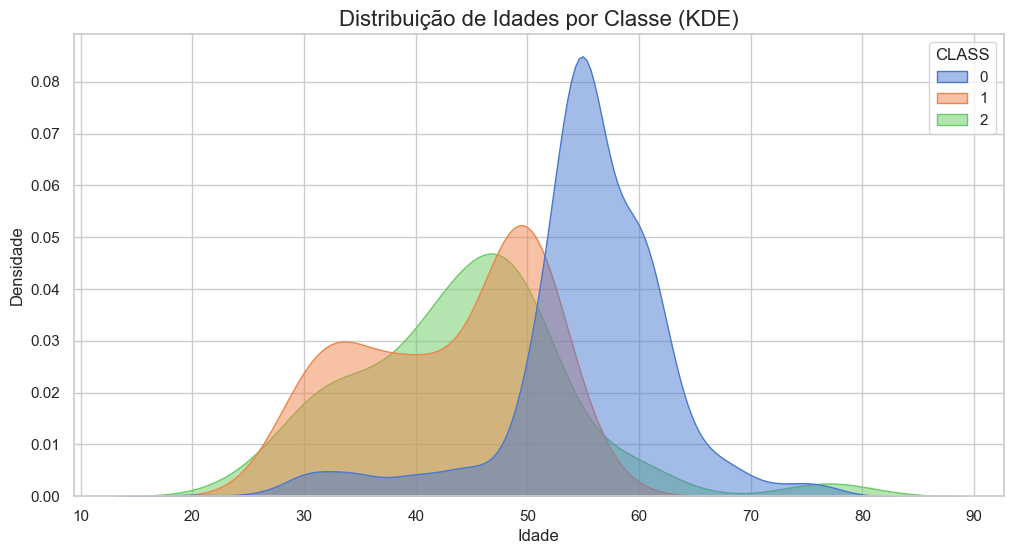

In [77]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data=ldd, x="AGE", hue="CLASS", fill=True, alpha=0.5, palette="muted", common_norm=False)
plt.title("Distribuição de Idades por Classe (KDE)", fontsize=16)
plt.xlabel("Idade")
plt.ylabel("Densidade")
plt.show()

### Searching for correlations

In [78]:
corr_matrix = ldd.corr()

In [79]:
corr_matrix['CLASS'].sort_values(ascending=False)

CLASS     1.000000
HDL       0.003545
LDL      -0.005116
Cr       -0.027307
Urea     -0.053881
Gender   -0.079874
VLDL     -0.096631
TG       -0.173250
Chol     -0.177270
AGE      -0.444086
HbA1c    -0.552875
BMI      -0.570493
Name: CLASS, dtype: float64

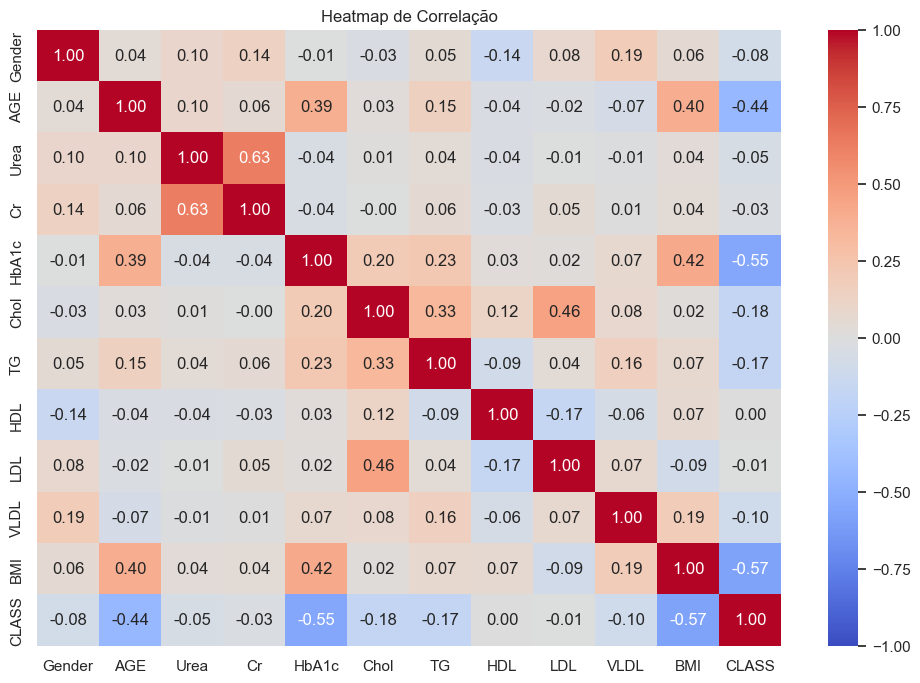

In [80]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Heatmap de Correlação")
plt.show()

As variáveis mais relevantes para prever CLASS são BMI, HbA1c e AGE, pois têm as correlações mais altas

### Peparando os dados para os algoritmos de ML

#### Identificação de Outliers

In [81]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

In [82]:
def preprocess_numeric_features(df, columns, show_plots=True):
    def detect_outliers_iqr(data):
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return (data < lower_bound) | (data > upper_bound)

    df = df.copy()

    outlier_mask = np.zeros(len(df), dtype=bool)
    for col in columns:
        df[f'{col}_outlier'] = detect_outliers_iqr(df[col])
        outlier_mask |= df[f'{col}_outlier']
        print(f"Outliers detectados em {col}: {df[f'{col}_outlier'].sum()}")

    print(f"\nTotal de linhas removidas por outliers: {outlier_mask.sum()}")
    df = df[~outlier_mask].reset_index(drop=True)

    transformer = PowerTransformer(method='yeo-johnson')
    for col in columns:
        original = df[col].values.reshape(-1, 1)
        transformed = transformer.fit_transform(original).flatten()
        df[col] = transformed

        if show_plots:
            fig, ax = plt.subplots(1, 2, figsize=(12, 5))
            sns.histplot(original.flatten(), bins=30, kde=True, ax=ax[0])
            ax[0].set_title(f'{col} (Original)')
            sns.histplot(transformed, bins=30, kde=True, ax=ax[1])
            ax[1].set_title(f'{col} (Yeo-Johnson)')
            plt.show()

            print(f"{col}:")
            print(f"  Skewness Original: {skew(original.flatten()):.2f}")
            print(f"  Skewness Transformado: {skew(transformed):.2f}\n")

    df.drop(columns=[f'{col}_outlier' for col in columns], inplace=True)

    return df

Outliers detectados em Urea: 54
Outliers detectados em Cr: 38
Outliers detectados em TG: 44
Outliers detectados em VLDL: 57

Total de linhas removidas por outliers: 148


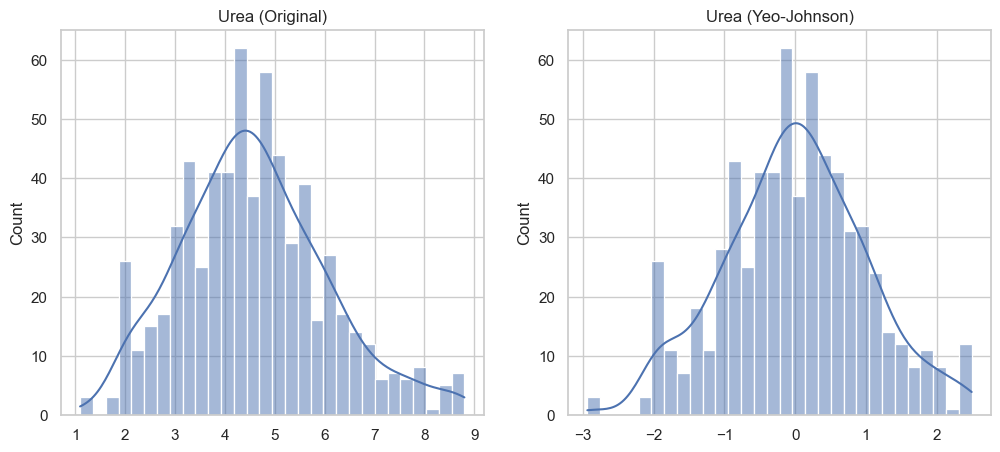

Urea:
  Skewness Original: 0.42
  Skewness Transformado: -0.00



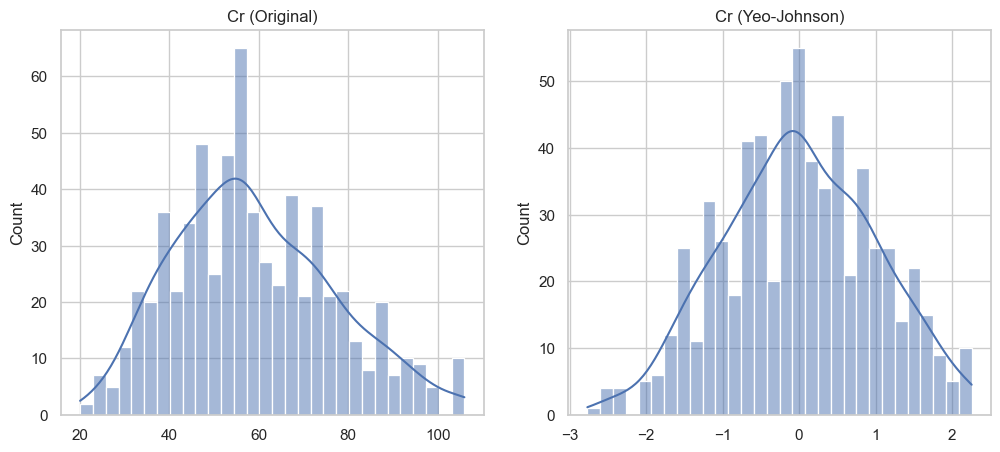

Cr:
  Skewness Original: 0.41
  Skewness Transformado: -0.02



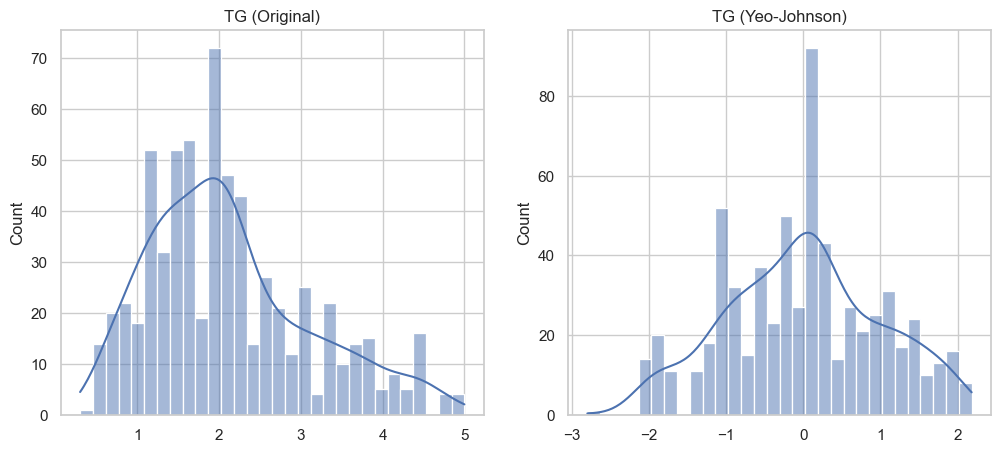

TG:
  Skewness Original: 0.75
  Skewness Transformado: 0.01



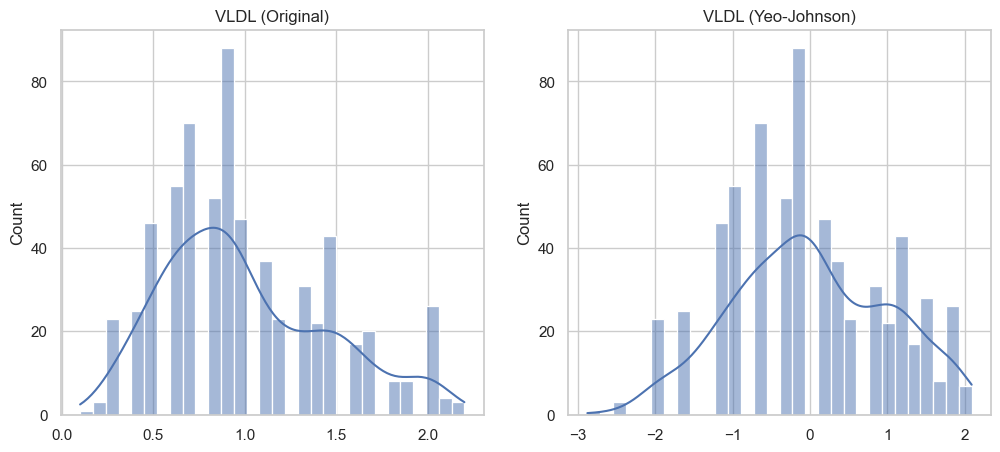

VLDL:
  Skewness Original: 0.62
  Skewness Transformado: 0.02



In [83]:
columns_to_transform = ['Urea', 'Cr', 'TG', 'VLDL']
ldd = preprocess_numeric_features(ldd, columns=columns_to_transform, show_plots=True)

#### Balancing the data

In [84]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [85]:
X = ldd.drop(columns=['CLASS'])
y = ldd['CLASS']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y,
  test_size=0.2,
  stratify=y,
  random_state=42
)

In [87]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [88]:
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 433, 2: 55, 1: 33})
After SMOTE: Counter({0: 433, 2: 433, 1: 433})


In [89]:
train_set_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

In [90]:
features = train_set_resampled.drop(columns=['CLASS', 'Gender', 'AGE', 'Cr'])
train_set_resampled = pd.concat([features.round(3), train_set_resampled[['CLASS', 'Gender', 'AGE', 'Cr']]], axis=1)

In [91]:
train_set_resampled = train_set_resampled[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS']]

In [92]:
train_set_resampled.to_csv(os.path.join(LDD_PATH, 'ldd_train_resampled.csv'), index=False)

print("Files saved successfully:")
print("- ldd_train_resampled.csv")

Files saved successfully:
- ldd_train_resampled.csv
